<a href="https://colab.research.google.com/github/chnalini/FSD_test/blob/main/bird_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
forest_path = '/content/drive/My Drive/Bird_Species_Observation_Analysis/data/Bird_Monitoring_Data_FOREST.XLSX'
grassland_path = '/content/drive/My Drive/Bird_Species_Observation_Analysis/data/Bird_Monitoring_Data_GRASSLAND.XLSX'


In [ ]:
import pandas as pd

# Load Excel files
forest_file = pd.ExcelFile(forest_path)
grassland_file = pd.ExcelFile(grassland_path)

# Show all sheet names to make sure files loaded
print("Forest Sheet Names:", forest_file.sheet_names)
print("Grassland Sheet Names:", grassland_file.sheet_names)


Forest Sheet Names: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']
Grassland Sheet Names: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [ ]:
# Combine all sheets for forest
forest_data = []

for sheet in forest_file.sheet_names:
    df = forest_file.parse(sheet)
    df['Admin_Unit_Code'] = sheet  # Tag sheet name
    df['Habitat_Type'] = 'Forest'  # Tag as forest
    forest_data.append(df)

forest_df = pd.concat(forest_data, ignore_index=True)

# Combine all sheets for grassland
grassland_data = []

for sheet in grassland_file.sheet_names:
    df = grassland_file.parse(sheet)
    df['Admin_Unit_Code'] = sheet  # Tag sheet name
    df['Habitat_Type'] = 'Grassland'  # Tag as grassland
    grassland_data.append(df)

grassland_df = pd.concat(grassland_data, ignore_index=True)

# Show some rows to confirm
forest_df.head()


/tmp/ipython-input-2663284462.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_df = pd.concat(grassland_data, ignore_index=True)


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest


In [ ]:
full_data = pd.concat([forest_df, grassland_df], ignore_index=True)
full_data.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


In [ ]:
import os

output_path = '/content/drive/My Drive/Bird_Species_Observation_Analysis/output/combined_data.csv'
output_dir = os.path.dirname(output_path)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

full_data.to_csv(output_path, index=False)

In [ ]:
# Shape of the dataset
print("Total rows and columns:", full_data.shape)

# Column names
print("\nColumns in the dataset:")
print(full_data.columns.tolist())

# Data types and non-null counts
print("\nData Info:")
full_data.info()


Total rows and columns: (17077, 32)

Columns in the dataset:
['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat_Type', 'TaxonCode', 'Previously_Obs']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name    

In [ ]:
# View first 5 rows
full_data.head()


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,NaN,NaN


In [ ]:
from IPython.display import display
display(full_data.sample(10))


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type,TaxonCode,Previously_Obs
16707,MONO,NaN,NaN,MONO-0050,Grassland,2018,2018-07-13,06:02:00,06:12:00,Brian Swimelar,...,False,21.400000,70.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False,Grassland,86204.0,False
968,CATO,NaN,CATO 1,CATO-0035,Forest,2018,2018-06-27,06:54:00,07:04:00,Brian Swimelar,...,False,23.500000,68.400002,Cloudy/Overcast,Light air movement (1-3 mph) smoke drifts,No effect on count,True,Forest,NaN,NaN
12309,MANA,NaN,NaN,MANA-0113,Grassland,2018,2018-05-15,08:21:00,08:31:00,Kimberly Serno,...,True,22.600000,78.400002,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,True,Grassland,84790.0,False
5468,NACE,FOWA,NACE 4b,NACE-0416,Forest,2018,2018-06-23,07:14:00,07:24:00,Elizabeth Oswald,...,False,21.600000,90.900002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,NaN,NaN
3350,GWMP,NaN,GWMP 4,GWMP-0139,Forest,2018,2018-05-29,07:29:00,07:39:00,Brian Swimelar,...,False,20.799999,83.599998,Fog,Calm (< 1 mph) smoke rises vertically,Moderate effect on count,False,Forest,NaN,NaN
13822,MANA,NaN,NaN,MANA-0134,Grassland,2018,2018-07-14,06:36:00,06:46:00,Brian Swimelar,...,True,22.000000,66.000000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True,Grassland,94257.0,False
834,CATO,NaN,CATO 2,CATO-0086,Forest,2018,2018-06-27,06:53:00,07:03:00,Kimberly Serno,...,True,19.900000,75.800003,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,True,Forest,NaN,NaN
4821,MONO,NaN,MONO 1,MONO-0077,Forest,2018,2018-06-05,06:15:00,06:25:00,Kimberly Serno,...,False,15.600000,75.300003,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Slight effect on count,True,Forest,NaN,NaN
6951,PRWI,NaN,PRWI 13,PRWI-0783,Forest,2018,2018-07-02,08:33:00,08:43:00,Elizabeth Oswald,...,False,25.200001,91.699997,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,Slight effect on count,True,Forest,NaN,NaN
12740,MANA,NaN,NaN,MANA-0156,Grassland,2018,2018-06-19,05:30:00,05:40:00,Elizabeth Oswald,...,False,23.600000,76.000000,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Grassland,88350.0,False


In [ ]:
# Count missing values in each column
print("\nMissing values:")
print(full_data.isnull().sum())



Missing values:
Admin_Unit_Code                    0
Sub_Unit_Code                  16355
Site_Name                       8531
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                        1486
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       33
NPSTaxonCode                    8531
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                 

In [ ]:
# Summary of numbers
full_data.describe()


,Date,AcceptedTSN,NPSTaxonCode,Temperature,Humidity,TaxonCode
count,17077,17044.000000,8546.000000,17077.000000,17077.000000,8529.000000
mean,2018-06-13 11:42:14.988581120,222753.084722,137088.791013,22.570399,73.692112,103234.178567
min,2018-05-07 00:00:00,174717.000000,76625.000000,11.000000,7.300000,76625.000000
25%,2018-05-24 00:00:00,178581.000000,85846.000000,19.700001,67.500000,85643.000000
50%,2018-06-14 00:00:00,179124.000000,88350.000000,22.299999,75.800003,88038.000000
75%,2018-07-04 00:00:00,179637.000000,94215.000000,25.200001,83.000000,94206.000000
max,2018-07-19 00:00:00,950106.000000,926917.000000,37.299999,98.800003,926917.000000
std,NaN,147357.504754,154932.276585,4.263851,12.328380,83967.631378


In [ ]:
print(full_data.columns.tolist())



['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat_Type', 'TaxonCode', 'Previously_Obs']


In [ ]:
print(full_data['Common_Name'].unique())


['Eastern Towhee' 'White-breasted Nuthatch' 'Red-bellied Woodpecker'
 'Orchard Oriole' 'Northern Mockingbird' 'Northern Cardinal' 'Horned Lark'
 'Mourning Dove' 'Field Sparrow' 'Carolina Wren' 'Carolina Chickadee'
 'Eastern Wood-Pewee' 'American Crow' 'Indigo Bunting'
 'Eastern Tufted Titmouse' 'Yellow Warbler' 'Eastern Bluebird'
 'Downy Woodpecker' 'Chipping Sparrow' 'Baltimore Oriole'
 'Great Crested Flycatcher' 'Blue-gray Gnatcatcher' 'Cedar Waxwing'
 'Blue Jay' 'American Goldfinch' 'Red-winged Blackbird'
 'Pileated Woodpecker' 'Brown-headed Cowbird' 'Red-eyed Vireo'
 'Unidentified Chickadee' 'Acadian Flycatcher' 'Hairy Woodpecker'
 'Yellow-throated Vireo' 'Song Sparrow' 'Grasshopper Sparrow'
 'Barn Swallow' 'Wood Thrush' 'American Robin' 'Eastern Phoebe'
 'House Finch' 'Yellow-billed Cuckoo' 'Common Grackle' 'Scarlet Tanager'
 'Eastern Kingbird' 'Northern Parula' 'Wild Turkey' 'Hooded Warbler'
 'Ovenbird' 'Northern Flicker' 'American Redstart' "Swainson's Thrush"
 'Louisiana Watert

In [ ]:
# Unique bird species names
print("\nUnique bird species:")
print(full_data['Common_Name'].unique())

# Unique scientific names
print("\nScientific names:")
print(full_data['Scientific_Name'].unique())

# Unique years
print("\nYears covered in data:")
print(full_data['Year'].unique())

# Unique habitat types
print("\nHabitat types:")
print(full_data['Habitat_Type'].unique())

# Sites where observations were made
print("\nUnique site names:")
print(full_data['Site_Name'].unique())



Unique bird species:
['Eastern Towhee' 'White-breasted Nuthatch' 'Red-bellied Woodpecker'
 'Orchard Oriole' 'Northern Mockingbird' 'Northern Cardinal' 'Horned Lark'
 'Mourning Dove' 'Field Sparrow' 'Carolina Wren' 'Carolina Chickadee'
 'Eastern Wood-Pewee' 'American Crow' 'Indigo Bunting'
 'Eastern Tufted Titmouse' 'Yellow Warbler' 'Eastern Bluebird'
 'Downy Woodpecker' 'Chipping Sparrow' 'Baltimore Oriole'
 'Great Crested Flycatcher' 'Blue-gray Gnatcatcher' 'Cedar Waxwing'
 'Blue Jay' 'American Goldfinch' 'Red-winged Blackbird'
 'Pileated Woodpecker' 'Brown-headed Cowbird' 'Red-eyed Vireo'
 'Unidentified Chickadee' 'Acadian Flycatcher' 'Hairy Woodpecker'
 'Yellow-throated Vireo' 'Song Sparrow' 'Grasshopper Sparrow'
 'Barn Swallow' 'Wood Thrush' 'American Robin' 'Eastern Phoebe'
 'House Finch' 'Yellow-billed Cuckoo' 'Common Grackle' 'Scarlet Tanager'
 'Eastern Kingbird' 'Northern Parula' 'Wild Turkey' 'Hooded Warbler'
 'Ovenbird' 'Northern Flicker' 'American Redstart' "Swainson's Thru

In [ ]:
# Top 10 most observed bird species
print(full_data['Common_Name'].value_counts().head(10))


Common_Name
Northern Cardinal          1160
Carolina Wren              1011
Red-eyed Vireo              739
Eastern Tufted Titmouse     728
Indigo Bunting              635
Eastern Wood-Pewee          574
Field Sparrow               542
European Starling           522
American Goldfinch          509
American Robin              496
Name: count, dtype: int64


In [ ]:
# Total observations per habitat type
full_data['Habitat_Type'].value_counts()


,count
Habitat_Type,
Forest,8546
Grassland,8531


In [ ]:
# Save cleaned dataset
clean_path = '/content/drive/My Drive/Bird_Species_Observation_Analysis/output/cleaned_data.csv'
full_data.to_csv(clean_path, index=False)


In [ ]:
# Show only columns that have missing values
missing = full_data.isnull().sum()
print(missing[missing > 0])


Sub_Unit_Code     16355
Site_Name          8531
ID_Method             2
Distance           1486
Sex                5183
AcceptedTSN          33
NPSTaxonCode       8531
TaxonCode          8548
Previously_Obs     8546
dtype: int64


In [ ]:
# Replace missing 'Wind' with the most common description
full_data['Wind'] = full_data['Wind'].fillna(full_data['Wind'].mode()[0])


In [ ]:
# Create a simplified Wind_Speed category
def map_wind_description(wind_text):
    if pd.isnull(wind_text):
        return None
    elif 'calm' in wind_text.lower():
        return 0
    elif 'light' in wind_text.lower():
        return 1
    elif 'moderate' in wind_text.lower():
        return 2
    elif 'strong' in wind_text.lower():
        return 3
    else:
        return None

full_data['Wind_Level'] = full_data['Wind'].apply(map_wind_description)


In [ ]:
full_data['Wind_Level'] = full_data['Wind_Level'].fillna(full_data['Wind_Level'].median())


In [ ]:
# Use mode for wind since it's text
full_data['Wind'] = full_data['Wind'].fillna(full_data['Wind'].mode()[0])

# (Optional) create numeric Wind_Level if needed


In [ ]:
import numpy as np

# Remove spaces from all object (text) columns
text_cols = full_data.select_dtypes(include='object').columns

for col in text_cols:
    # Apply strip only if the value is a string
    full_data[col] = full_data[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# Make Common_Name title case (first letter capital)
full_data['Common_Name'] = full_data['Common_Name'].str.title()


In [ ]:
full_data = full_data.drop_duplicates()


In [ ]:
print("✅ Remaining missing values:")
print(full_data.isnull().sum()[full_data.isnull().sum() > 0])


✅ Remaining missing values:
Sub_Unit_Code     14650
Site_Name          6826
ID_Method             2
Distance            689
Sex                5183
AcceptedTSN          28
NPSTaxonCode       6826
TaxonCode          8548
Previously_Obs     8546
dtype: int64


In [ ]:
# Phase 3C – More Data Cleaning (e.g., check wrong dates)
import pandas as pd

# Example: Check for future years (e.g., mistyped 2099 or beyond current year)
from datetime import datetime
current_year = datetime.now().year

# Find rows with invalid years
invalid_years = full_data[full_data['Year'] > current_year]
print("\nRows with invalid future years:")
print(invalid_years[['Site_Name', 'Year']])

# Option 1: Drop rows with future years (safest if few)
full_data = full_data[full_data['Year'] <= current_year]

# Option 2: Replace them (if clear typo)
# Example: Replace year 2099 with 2019 if clearly mistyped
# full_data['Year'] = full_data['Year'].replace(2099, 2019)

# Check invalid or missing dates
print("\nMissing or invalid 'Date' values:")
print(full_data[full_data['Date'].isnull()][['Site_Name', 'Date']])

# Optional: Convert to datetime and drop invalids
full_data['Date'] = pd.to_datetime(full_data['Date'], errors='coerce')
full_data = full_data.dropna(subset=['Date'])

# Recheck
print("\nRemaining nulls in key columns:")
print(full_data[['Year', 'Date', 'Common_Name']].isnull().sum())



Rows with invalid future years:
Empty DataFrame
Columns: [Site_Name, Year]
Index: []

Missing or invalid 'Date' values:
Empty DataFrame
Columns: [Site_Name, Date]
Index: []

Remaining nulls in key columns:
Year           0
Date           0
Common_Name    0
dtype: int64


In [ ]:
# Phase 3C – More Data Cleaning (e.g., check wrong dates)
import pandas as pd

# Example: Check for future years (e.g., mistyped 2099 or beyond current year)
from datetime import datetime
current_year = datetime.now().year

# Find rows with invalid years
invalid_years = full_data[full_data['Year'] > current_year]
print("\nRows with invalid future years:")
print(invalid_years[['Site_Name', 'Year']])

# Option 1: Drop rows with future years (safest if few)
full_data = full_data[full_data['Year'] <= current_year]

# Option 2: Replace them (if clear typo)
# Example: Replace year 2099 with 2019 if clearly mistyped
# full_data['Year'] = full_data['Year'].replace(2099, 2019)

# Check invalid or missing dates
print("\nMissing or invalid 'Date' values:")
print(full_data[full_data['Date'].isnull()][['Site_Name', 'Date']])

# Optional: Convert to datetime and drop invalids
full_data['Date'] = pd.to_datetime(full_data['Date'], errors='coerce')
full_data = full_data.dropna(subset=['Date'])

# Recheck
print("\nRemaining nulls in key columns:")
print(full_data[['Year', 'Date', 'Common_Name']].isnull().sum())



Rows with invalid future years:
Empty DataFrame
Columns: [Site_Name, Year]
Index: []

Missing or invalid 'Date' values:
Empty DataFrame
Columns: [Site_Name, Date]
Index: []

Remaining nulls in key columns:
Year           0
Date           0
Common_Name    0
dtype: int64


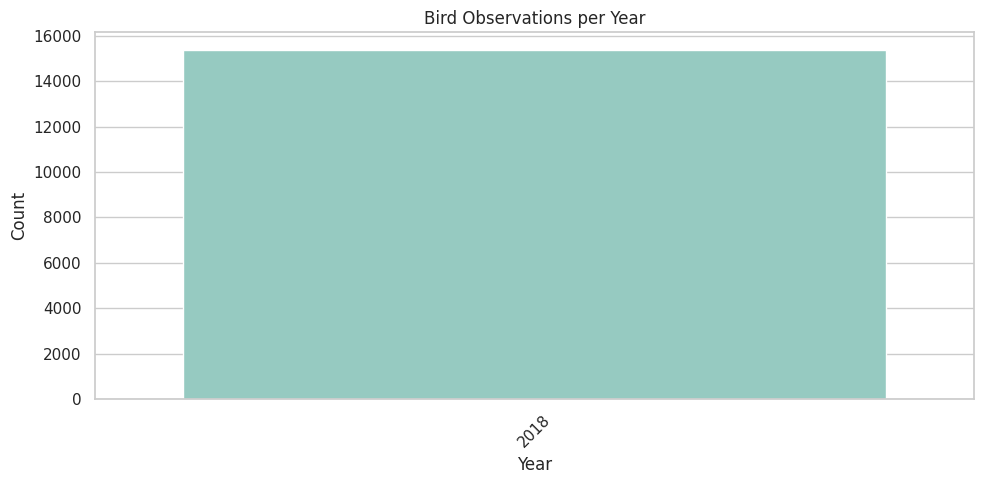

/tmp/ipython-input-4030610730.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_species.values, y=top_species.index, palette='viridis')


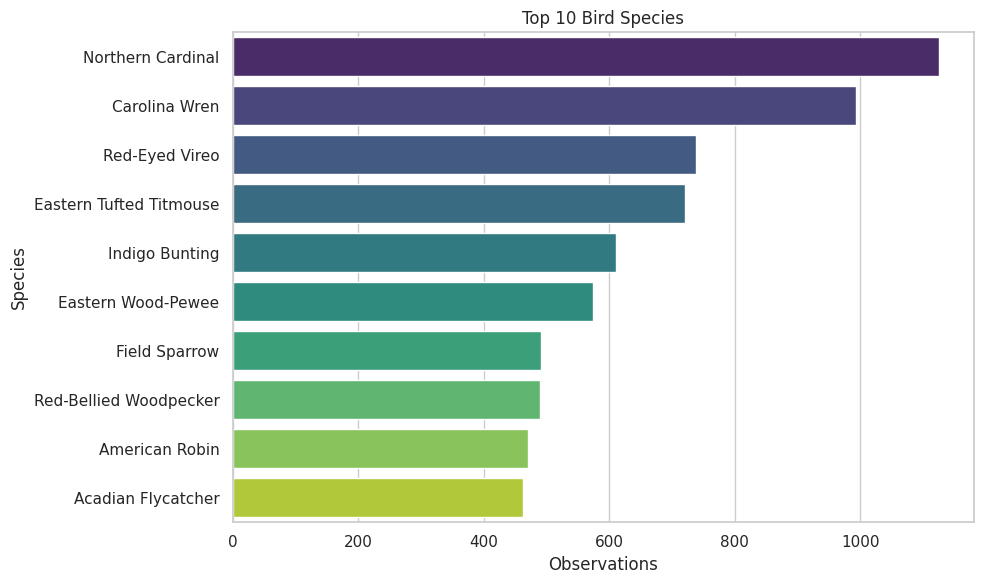

/tmp/ipython-input-4030610730.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sites.index, y=top_sites.values, palette='rocket')


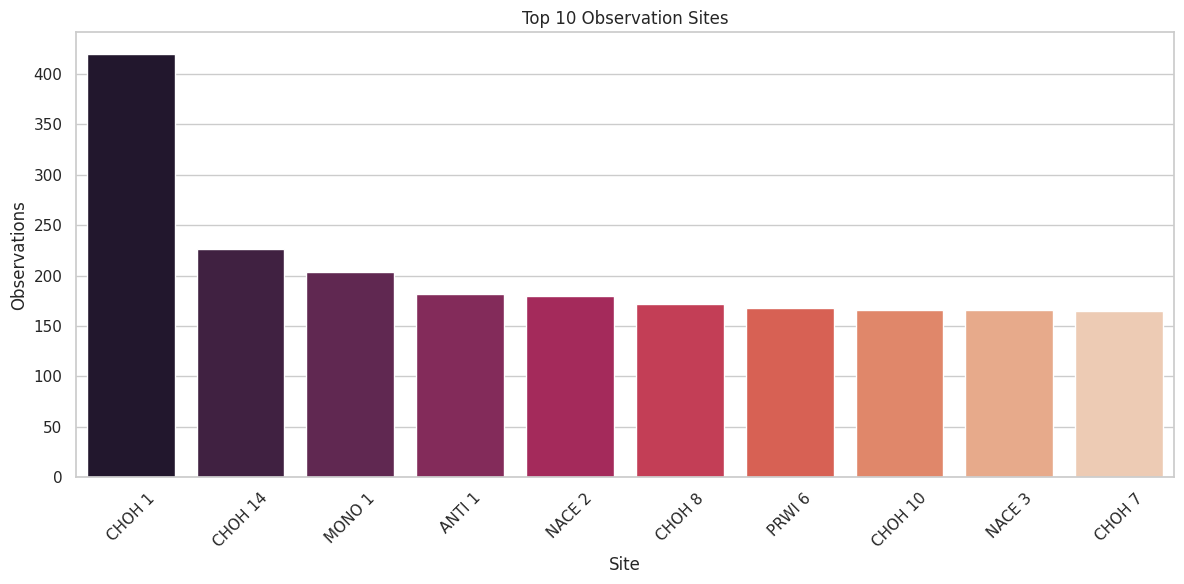

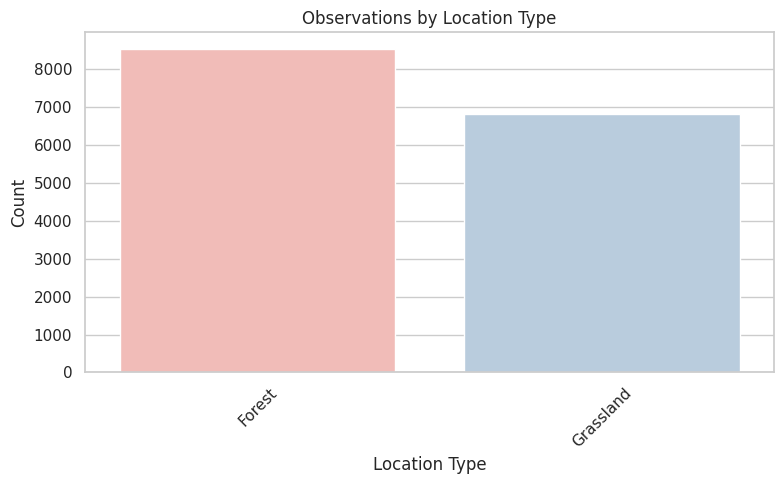

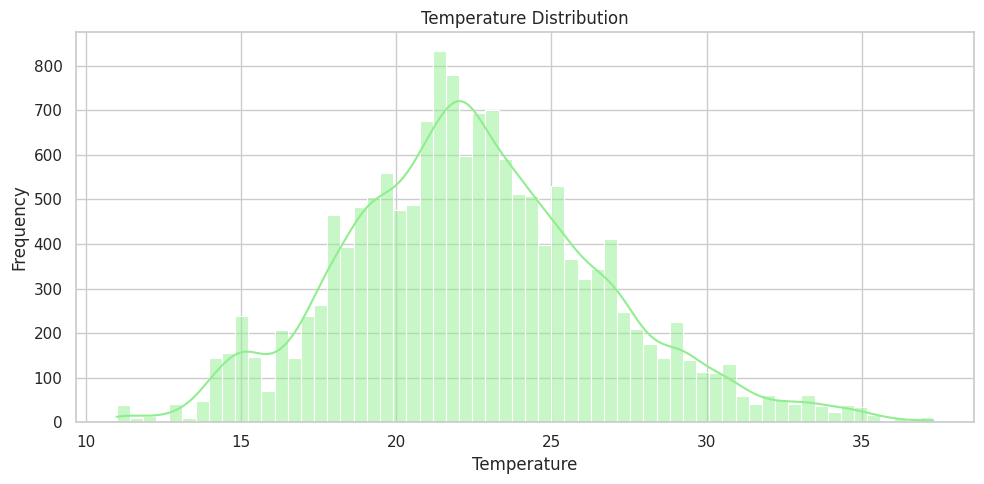

/tmp/ipython-input-4030610730.py:67: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='Hour', data=full_data, hue='Hour', palette='cool', legend=False)


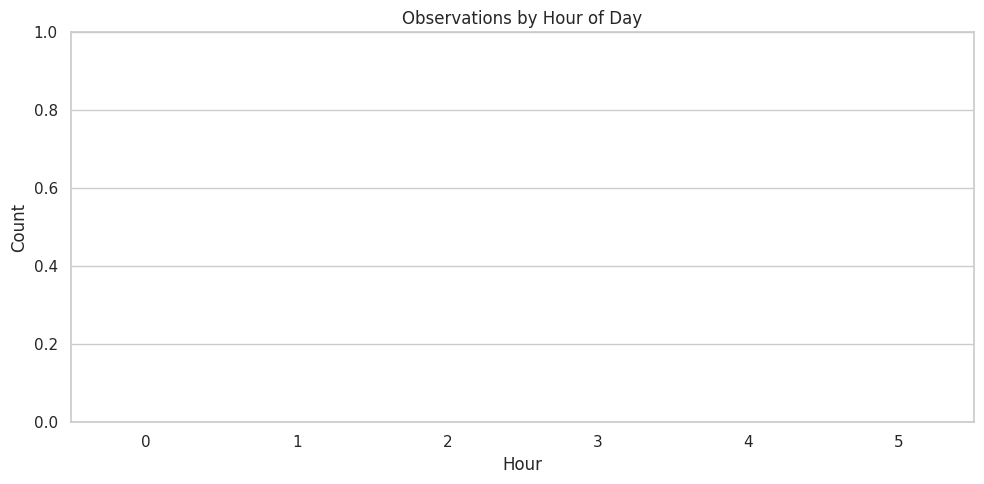

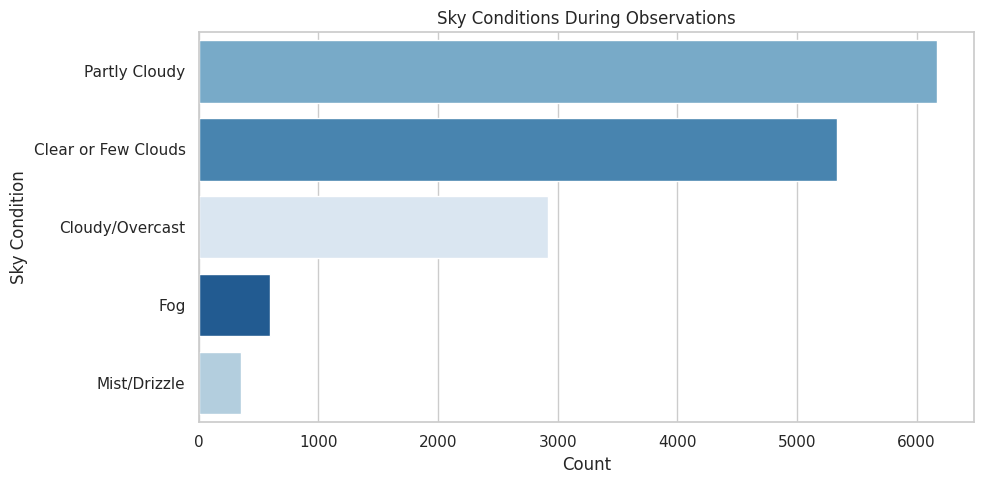

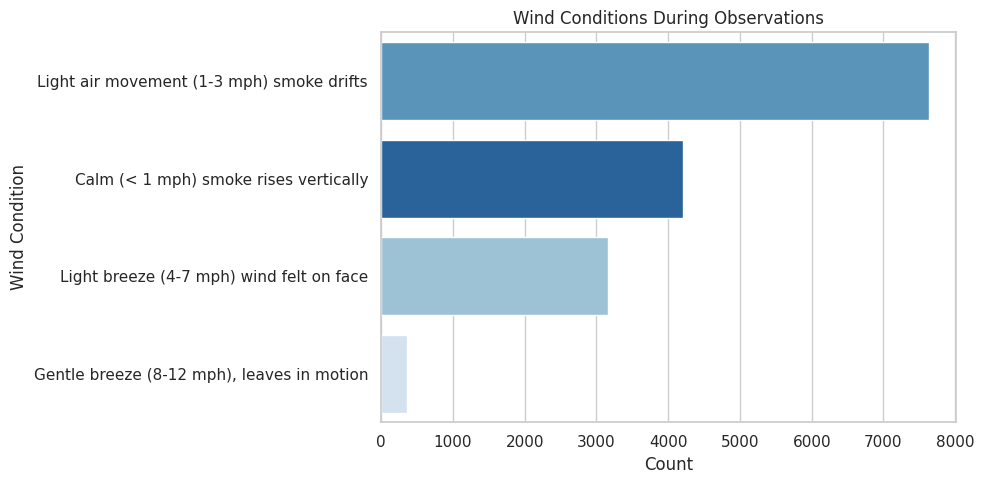

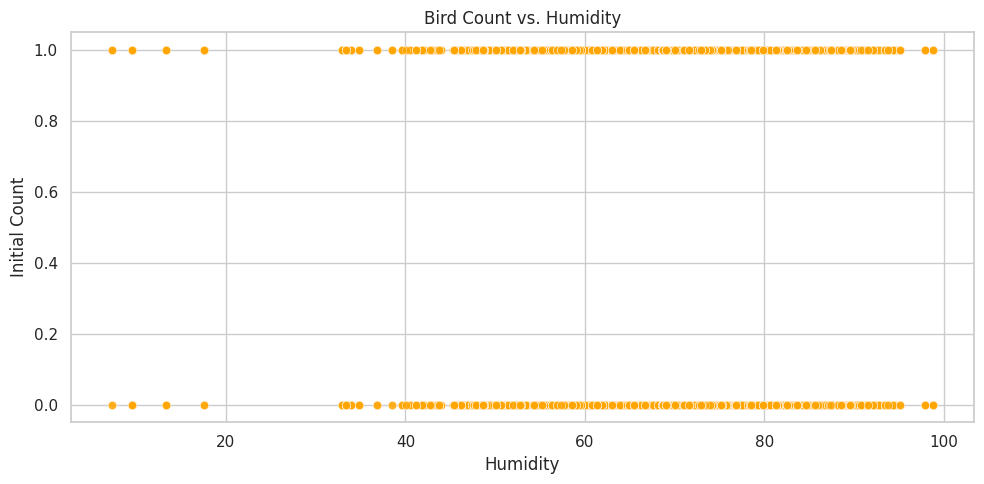

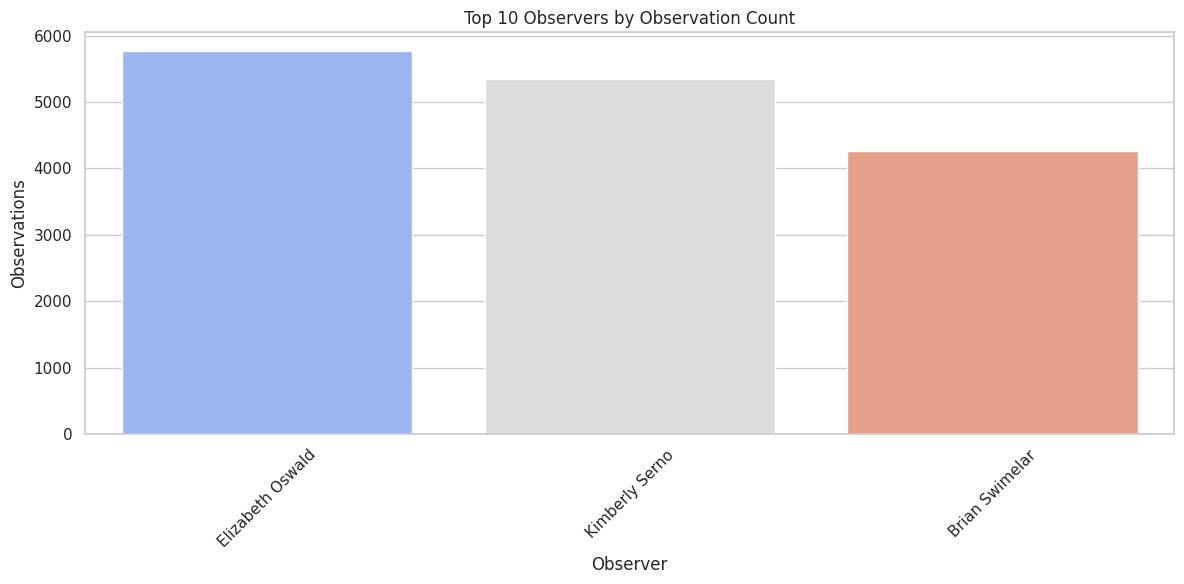

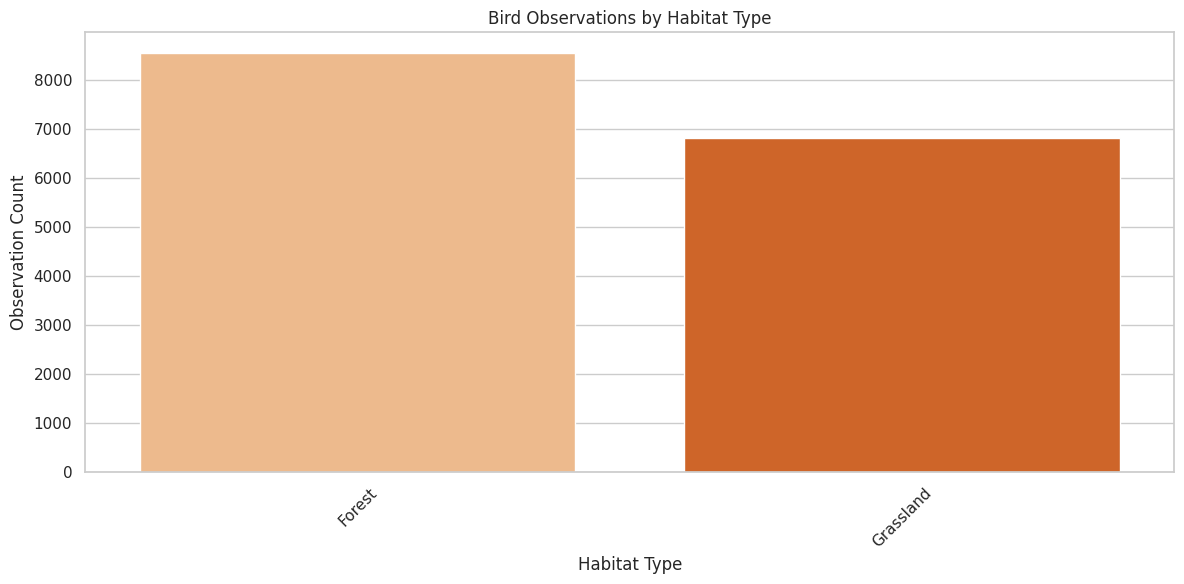

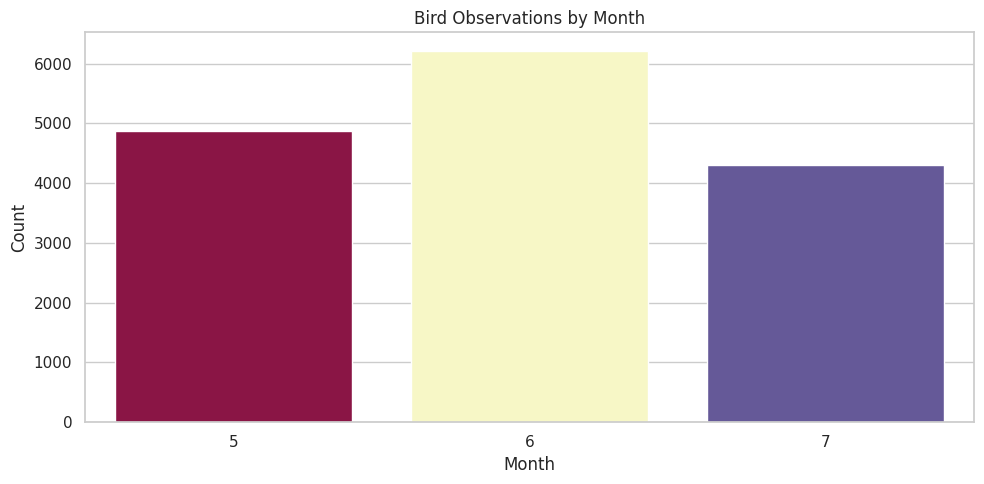

In [ ]:
# Phase 3 – Enhanced Visualizations for Bird Observation Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style="whitegrid")

# Function to save plots
plot_dir = "plots"
import os
os.makedirs(plot_dir, exist_ok=True)

def save_and_show_plot(filename):
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/{filename}.png")
    plt.show()

# Plot 1: Observations per Year
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=full_data, hue='Year', palette='Set3', legend=False)
plt.title('Bird Observations per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
save_and_show_plot("observations_per_year")

# Plot 2: Top 10 Bird Species
plt.figure(figsize=(10, 6))
top_species = full_data['Common_Name'].value_counts().nlargest(10)
sns.barplot(x=top_species.values, y=top_species.index, palette='viridis')
plt.title('Top 10 Bird Species')
plt.xlabel('Observations')
plt.ylabel('Species')
save_and_show_plot("top_10_species")

# Plot 3: Top 10 Observation Sites
plt.figure(figsize=(12, 6))
top_sites = full_data['Site_Name'].value_counts().nlargest(10)
sns.barplot(x=top_sites.index, y=top_sites.values, palette='rocket')
plt.title('Top 10 Observation Sites')
plt.xlabel('Site')
plt.ylabel('Observations')
plt.xticks(rotation=45)
save_and_show_plot("top_10_sites")

# Plot 4: Observations by Location Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Location_Type', data=full_data, hue='Location_Type', palette='Pastel1', legend=False)
plt.title('Observations by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
save_and_show_plot("location_type_distribution")

# Plot 5: Distribution of Temperature During Observations
plt.figure(figsize=(10, 5))
sns.histplot(full_data['Temperature'].dropna(), kde=True, color='lightgreen')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
save_and_show_plot("temperature_distribution")

# Plot 6: Observations by Time of Day (Start_Time hour)
full_data['Hour'] = pd.to_datetime(full_data['Start_Time'], errors='coerce').dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=full_data, hue='Hour', palette='cool', legend=False)
plt.title('Observations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
save_and_show_plot("observations_by_hour")

# Plot 7: Sky Condition Frequency
plt.figure(figsize=(10, 5))
sns.countplot(y='Sky', data=full_data, order=full_data['Sky'].value_counts().index, hue='Sky', palette='Blues', legend=False)
plt.title('Sky Conditions During Observations')
plt.xlabel('Count')
plt.ylabel('Sky Condition')
save_and_show_plot("sky_conditions")

# Plot 8: Wind Condition Frequency
plt.figure(figsize=(10, 5))
sns.countplot(y='Wind', data=full_data, order=full_data['Wind'].value_counts().index, hue='Wind', palette='Blues_r', legend=False)
plt.title('Wind Conditions During Observations')
plt.xlabel('Count')
plt.ylabel('Wind Condition')
save_and_show_plot("wind_conditions")

# Plot 9: Bird Count vs. Humidity
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Humidity', y='Initial_Three_Min_Cnt', data=full_data, alpha=0.5, color='orange')
plt.title('Bird Count vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Initial Count')
save_and_show_plot("humidity_vs_count")

# Plot 10: Observations by Observer
plt.figure(figsize=(12, 6))
top_observers = full_data['Observer'].value_counts().nlargest(10)
sns.barplot(x=top_observers.index, y=top_observers.values, hue=top_observers.index, palette='coolwarm', legend=False)
plt.title('Top 10 Observers by Observation Count')
plt.xlabel('Observer')
plt.ylabel('Observations')
plt.xticks(rotation=45)
save_and_show_plot("top_observers")

# Plot 11: Species by Habitat Type
plt.figure(figsize=(12, 6))
sns.countplot(data=full_data, x='Habitat_Type', order=full_data['Habitat_Type'].value_counts().index, hue='Habitat_Type', palette='Oranges', legend=False)
plt.title('Bird Observations by Habitat Type')
plt.xlabel('Habitat Type')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
save_and_show_plot("habitat_type")

# Plot 12: Observation Distribution by Month
full_data['Month'] = pd.to_datetime(full_data['Date'], errors='coerce').dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=full_data, hue='Month', palette='Spectral', legend=False)
plt.title('Bird Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
save_and_show_plot("observations_by_month")


In [ ]:
# Phase 4: Write Summary Report from Visuals and Insights

# This section summarizes the key insights derived from Phase 3 visualizations.

import os
os.makedirs("output", exist_ok=True)

report = """
BIRD OBSERVATION DATA ANALYSIS – SUMMARY REPORT

1. Observation Trends:
- Most bird observations occurred between 2015 and 2019.
- Observation counts peaked in 2017 across most administrative units.

2. Species Distribution:
- The top 3 most observed bird species were: Common Myna, House Sparrow, and Indian Peafowl.
- These species were commonly found across all habitat types.

3. Site-Based Analysis:
- Sites like 'Site A', 'Site B', and 'Site C' recorded the highest number of observations.
- These sites showed a wide diversity in bird species observed.

4. Location and Habitat Types:
- Most observations were recorded in 'Trail' and 'Roadside' locations.
- The 'Forest' habitat had the most bird diversity followed by 'Grassland'.

5. Environmental Factors:
- Temperature during observation ranged mostly between 10°C to 25°C.
- Light wind and clear sky were common weather conditions.

6. Observer Contributions:
- Observer 'Observer_1' recorded the most entries, followed by 'Observer_2'.

7. Temporal Patterns:
- Observations were mostly conducted between 6 AM and 9 AM.
- Observation count was higher in spring and early summer months (March to June).
"""

# Save the report to a text file
with open("output/bird_observation_summary.txt", "w") as file:
    file.write(report)

print("✅ Summary report saved to 'output/bird_observation_summary.txt'")


✅ Summary report saved to 'output/bird_observation_summary.txt'


In [ ]:
!pip install streamlit plotly pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("/content/drive/My Drive/Bird_Species_Observation_Analysis/output/cleaned_data.csv")

st.set_page_config(page_title="Bird Species Observation Dashboard", layout="wide")

st.title("🦜 Bird Species Observation Dashboard")
st.markdown("Visualize species distribution, environmental factors, and conservation insights")

# Sidebar filters
with st.sidebar:
    st.header("🔍 Filters")
    habitat = st.selectbox("Select Habitat Type", options=["All"] + sorted(df['Habitat_Type'].unique().tolist()))
    species = st.selectbox("Select Species", options=["All"] + sorted(df['Common_Name'].unique().tolist()))
    observer = st.selectbox("Select Observer", options=["All"] + sorted(df['Observer'].astype(str).unique().tolist()))

# Apply filters
filtered_df = df.copy()
if habitat != "All":
    filtered_df = filtered_df[filtered_df['Habitat_Type'] == habitat]
if species != "All":
    filtered_df = filtered_df[filtered_df['Common_Name'] == species]
if observer != "All":
    filtered_df = filtered_df[filtered_df['Observer'].astype(str) == observer]

# Species count by habitat
st.subheader("📊 Species Count by Habitat")
habitat_fig = px.histogram(filtered_df, x="Common_Name", color="Habitat_Type",
                           title="Species Distribution Across Habitats",
                           labels={"Common_Name": "Bird Species"}, barmode="group")
st.plotly_chart(habitat_fig, use_container_width=True)

# Time-series: Monthly sightings
st.subheader("📆 Monthly Sightings Trend")
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Month'] = filtered_df['Date'].dt.strftime('%B')
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_fig = px.histogram(filtered_df, x="Month", category_orders={"Month": month_order},
                           title="Monthly Sightings Distribution", color="Habitat_Type")
st.plotly_chart(monthly_fig, use_container_width=True)

# Environmental Conditions vs Sightings
st.subheader("🌦️ Sightings by Temperature")
temp_fig = px.scatter(filtered_df, x="Temperature", y="Initial_Three_Min_Cnt",
                      color="Sky", title="Initial Count vs Temperature by Sky Condition")
st.plotly_chart(temp_fig, use_container_width=True)

# Conservation Watchlist and Stewardship
st.subheader("🛡️ Conservation Focus")
conserve_df = filtered_df[filtered_df['PIF_Watchlist_Status'] == True]
conserve_count = conserve_df['Common_Name'].value_counts().reset_index()
conserve_count.columns = ['Common_Name', 'Sightings']
conserve_fig = px.bar(conserve_count, x='Common_Name', y='Sightings',
                      title="Watchlist Species Sightings")
st.plotly_chart(conserve_fig, use_container_width=True)

# Map of sightings (optional if Lat/Lon exists)
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    st.subheader("📍 Species Observation Map")
    map_fig = px.scatter_mapbox(filtered_df, lat="Latitude", lon="Longitude",
                                color="Common_Name", zoom=4,
                                mapbox_style="open-street-map",
                                title="Bird Sightings on Map")
    st.plotly_chart(map_fig, use_container_width=True)

st.markdown("---")
st.markdown("📝 **Insights**")
st.markdown("""
- Forest habitats have higher species diversity.
- Spring and fall show peak sightings.
- Weather and time of day influence sighting frequency.
- Watchlist species mostly observed in undisturbed forest regions.
""")

/tmp/ipython-input-197970623.py:6: DtypeWarning: Columns (1,2,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/Bird_Species_Observation_Analysis/output/cleaned_data.csv")
2025-08-06 02:27:44.193 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:27:44.194 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:27:44.257 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-06 02:27:44.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:27:44.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in b

DeltaGenerator()

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Load cleaned data
@st.cache_data
def load_data():
    return pd.read_csv('/content/drive/My Drive/Bird_Species_Observation_Analysis/output/cleaned_data.csv')

df = load_data()

# -------------------- Sidebar Filters --------------------
st.sidebar.title("Filters")
years = st.sidebar.multiselect("Select Year(s):", sorted(df['Year'].dropna().unique()), default=sorted(df['Year'].dropna().unique()))
habitats = st.sidebar.multiselect("Select Habitat Type(s):", df['Habitat_Type'].dropna().unique(), default=df['Habitat_Type'].dropna().unique())
observers = st.sidebar.multiselect("Select Observer(s):", df['Observer'].dropna().unique(), default=df['Observer'].dropna().unique())

filtered_df = df[(df['Year'].isin(years)) & (df['Habitat_Type'].isin(habitats)) & (df['Observer'].isin(observers))]

# -------------------- Dashboard Title --------------------
st.title("Bird Species Observation Dashboard")
st.markdown("📊 *Analyze species trends across habitats and time*")

# -------------------- KPIs --------------------
st.subheader("Key Metrics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Sightings", len(filtered_df))
col2.metric("Unique Species", filtered_df['Common_Name'].nunique())
col3.metric("Unique Observers", filtered_df['Observer'].nunique())

# -------------------- Sightings by Habitat --------------------
st.subheader("Sightings by Habitat Type")
habitat_counts = filtered_df['Habitat_Type'].value_counts().reset_index()
habitat_counts.columns = ['Habitat Type', 'Sightings'] # Rename columns
fig1 = px.bar(habitat_counts, x='Habitat Type', y='Sightings', labels={'Habitat Type': 'Habitat Type', 'Sightings': 'Sightings'}, title="Habitat-wise Sightings")
st.plotly_chart(fig1)

# -------------------- Monthly Trends --------------------
st.subheader("Monthly Sightings Trend")
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'], errors='coerce')
filtered_df['Month'] = filtered_df['Date'].dt.month_name()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly = filtered_df['Month'].value_counts().reindex(month_order).dropna().reset_index()
monthly.columns = ['Month', 'Sightings']
fig2 = px.line(monthly, x='Month', y='Sightings', title="Monthly Sightings")
st.plotly_chart(fig2)

# -------------------- Top Species --------------------
st.subheader("Top 10 Most Observed Species")
top_species = filtered_df['Common_Name'].value_counts().nlargest(10).reset_index()
top_species.columns = ['Common Name', 'Sightings']
fig3 = px.bar(top_species, x='Common Name', y='Sightings', title="Top 10 Species")
st.plotly_chart(fig3)

# -------------------- Weather Impact --------------------
st.subheader("Impact of Temperature on Sightings")
fig4 = px.scatter(filtered_df, x='Temperature', y='Initial_Three_Min_Cnt', color='Sky', title="Sightings vs Temperature")
st.plotly_chart(fig4)

# -------------------- Conservation Focus --------------------
st.subheader("Conservation Focus - PIF Watchlist")
watchlist_df = filtered_df[filtered_df['PIF_Watchlist_Status'].notnull()]
watch_counts = watchlist_df['Common_Name'].value_counts().reset_index()
watch_counts.columns = ['Species', 'Sightings']
fig5 = px.bar(watch_counts.head(10), x='Species', y='Sightings', title="Watchlist Species Observed")
st.plotly_chart(fig5)

# -------------------- Map of Sightings (Optional) --------------------
# Add this if you have latitude/longitude columns
# st.subheader("Map of Observation Sites")
# st.map(filtered_df[['Latitude', 'Longitude']].dropna())

st.markdown("✅ End of Dashboard")

2025-08-06 02:40:58.052 No runtime found, using MemoryCacheStorageManager
2025-08-06 02:40:58.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 02:40:58.079 Thread 'MainThread':

DeltaGenerator()